In [2498]:
import pandas as pd

In [2499]:
import numpy as np

In [2500]:
import  matplotlib.pyplot as plt

In [2501]:
dataSet=pd.read_csv("garments_worker_productivity.csv")

In [2502]:
dataSetOrign=dataSet.copy()

In [2503]:
dataSet.isna().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

In [2504]:
dataSet.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [2505]:
dataSet['wip'].fillna(value=dataSet['wip'].mean() , inplace= True)

In [2506]:
dataSet.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [2507]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [2508]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [2509]:
dataSet.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.000000,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.000000,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.000000,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.000000,6900,45,0.0,0,0,57.5,0.750428


In [2510]:
dataSet['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [2511]:
qua_dec={'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5 }

In [2512]:
dataSet['quarter']=dataSet['quarter'].map(qua_dec)

In [2513]:
day_dec={'Saturday':1, 'Sunday':2, 'Monday':3, 'Tuesday':4, 'Wednesday':5, 'Thursday':6 }

In [2514]:
dataSet['day']=dataSet['day'].map(day_dec)

In [2515]:
dataSet["day"].unique()

array([6, 1, 2, 3, 4, 5], dtype=int64)

In [2516]:
dummy = pd.get_dummies(dataSet["department"], prefix="department")
dummy.head()

,department_finishing,department_finishing,department_sweing
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [2517]:
dataSet=pd.concat([dataSet,dummy] ,axis=1)

In [2518]:
dataSet=dataSet.drop(['department'] ,axis=1)

In [2519]:
dataSet.head()  

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing,department_sweing
0,1/1/2015,1,6,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725,0,0,1
1,1/1/2015,1,6,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500,0,1,0
2,1/1/2015,1,6,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,0,0,1
3,1/1/2015,1,6,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570,0,0,1
4,1/1/2015,1,6,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382,0,0,1


In [2520]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
 14  department_finishing   1197 non-null   uint8  
 15  depa

In [2521]:
dataSet['no_of_workers']=dataSet['no_of_workers'].astype(int)

In [2522]:
dataSet.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing,department_sweing
0,1/1/2015,1,6,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59,0.940725,0,0,1
1,1/1/2015,1,6,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8,0.886500,0,1,0
2,1/1/2015,1,6,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30,0.800570,0,0,1
3,1/1/2015,1,6,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30,0.800570,0,0,1
4,1/1/2015,1,6,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56,0.800382,0,0,1


In [2523]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int32  
 13  actual_productivity    1197 non-null   float64
 14  department_finishing   1197 non-null   uint8  
 15  depa

In [2524]:
dataSet['date']=dataSet['date'].str.replace("/","")

In [2525]:
dataSet['date'].unique()

array(['112015', '132015', '142015', '152015', '162015', '172015',
       '182015', '1102015', '1112015', '1122015', '1132015', '1142015',
       '1152015', '1172015', '1182015', '1192015', '1202015', '1212015',
       '1222015', '1242015', '1252015', '1262015', '1272015', '1282015',
       '1292015', '1312015', '212015', '222015', '232015', '242015',
       '252015', '272015', '282015', '292015', '2102015', '2112015',
       '2122015', '2142015', '2152015', '2162015', '2172015', '2182015',
       '2192015', '2222015', '2232015', '2242015', '2252015', '2262015',
       '2282015', '312015', '322015', '332015', '342015', '352015',
       '372015', '382015', '392015', '3102015', '3112015'], dtype=object)

In [2526]:
dataSet['date']=dataSet['date'].astype(int)

In [2527]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int32  
 13  actual_productivity    1197 non-null   float64
 14  department_finishing   1197 non-null   uint8  
 15  depa

In [2528]:
dataSet.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing,department_sweing
0,112015,1,6,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59,0.940725,0,0,1
1,112015,1,6,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8,0.886500,0,1,0
2,112015,1,6,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30,0.800570,0,0,1
3,112015,1,6,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30,0.800570,0,0,1
4,112015,1,6,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56,0.800382,0,0,1


In [2529]:
print(dataSet.shape)

(1197, 17)


In [2530]:
dataSet.describe()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing,department_sweing
count,1.197000e+03,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,1.152642e+06,2.399332,3.532164,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.551378,0.735091,0.208020,0.214703,0.577277
std,8.556012e+05,1.215535,1.694969,3.463963,0.097891,10.943219,1395.647261,3348.823563,160.182643,12.709757,3.268987,0.427848,22.152559,0.174488,0.406061,0.410788,0.494199
min,1.120150e+05,1.000000,1.000000,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,0.000000,0.000000,0.000000
25%,3.120150e+05,1.000000,2.000000,3.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,0.000000,0.000000,0.000000
50%,1.172015e+06,2.000000,4.000000,6.000000,0.750000,15.260000,1190.465991,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,0.000000,0.000000,1.000000
75%,2.122015e+06,3.000000,5.000000,9.000000,0.800000,24.260000,1190.465991,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,0.000000,0.000000,1.000000
max,3.112015e+06,5.000000,6.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,1.000000,1.000000,1.000000


In [2531]:
Q1=dataSet.quantile(0.25)
Q3=dataSet.quantile(0.75)
IQR=Q3-Q1
print(IQR)

date                     1.810000e+06
quarter                  2.000000e+00
day                      3.000000e+00
team                     6.000000e+00
targeted_productivity    1.000000e-01
smv                      2.032000e+01
wip                      2.204660e+02
over_time                5.520000e+03
incentive                5.000000e+01
idle_time                0.000000e+00
idle_men                 0.000000e+00
no_of_style_change       0.000000e+00
no_of_workers            4.800000e+01
actual_productivity      1.999454e-01
department_finishing     0.000000e+00
department_finishing     0.000000e+00
department_sweing        1.000000e+00
dtype: float64


In [2532]:
print((dataSet<(Q1-1.5*IQR)) | (dataSet> (Q3+ 1.5*IQR)))

       date  quarter    day   team  targeted_productivity    smv    wip  \
0     False    False  False  False                  False  False  False   
1     False    False  False  False                  False  False  False   
2     False    False  False  False                  False  False  False   
3     False    False  False  False                  False  False  False   
4     False    False  False  False                  False  False  False   
...     ...      ...    ...    ...                    ...    ...    ...   
1192  False    False  False  False                  False  False  False   
1193  False    False  False  False                  False  False  False   
1194  False    False  False  False                  False  False  False   
1195  False    False  False  False                  False  False  False   
1196  False    False  False  False                  False  False  False   

      over_time  incentive  idle_time  idle_men  no_of_style_change  \
0         False      False  

In [2533]:
dataSet.skew()

date                      0.451140
quarter                   0.386482
day                      -0.021836
team                      0.009848
targeted_productivity    -2.144150
smv                       0.405937
wip                      12.809939
over_time                 0.673287
incentive                15.790746
idle_time                20.545425
idle_men                  9.855079
no_of_style_change        2.942506
no_of_workers            -0.110965
actual_productivity      -0.807492
department_finishing      1.440516
department_finishing      1.391345
department_sweing        -0.313258
dtype: float64

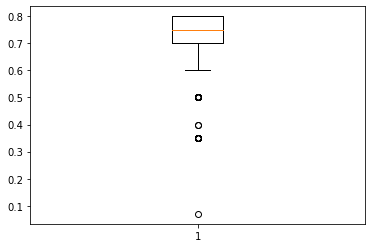

In [2534]:
plt.boxplot(dataSet["targeted_productivity"])
plt.show()

<AxesSubplot:>

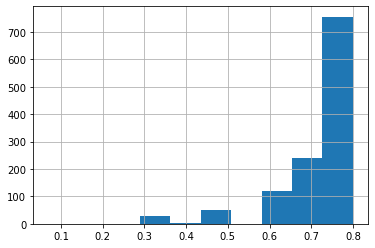

In [2535]:
dataSet.targeted_productivity.hist()

In [2536]:
print(dataSet['targeted_productivity'].quantile(0.10))
print(dataSet['targeted_productivity'].quantile(0.90))

0.6
0.8


In [2537]:
print(dataSet['targeted_productivity'].skew())

dataSet['targeted_productivity']=np.where(dataSet['targeted_productivity'] < 0.6 , 0.6 , dataSet['targeted_productivity'])
dataSet['targeted_productivity']=np.where(dataSet['targeted_productivity'] > 0.8 , 0.8 , dataSet['targeted_productivity'])

print(dataSet['targeted_productivity'].skew())

-2.144150033252199
-0.8529899016272227


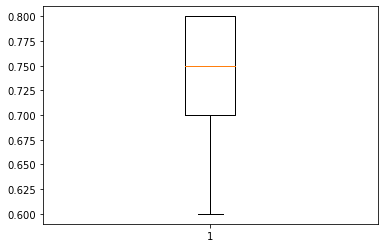

In [2538]:
plt.boxplot(dataSet["targeted_productivity"])
plt.show()

In [2539]:
print(dataSet['wip'].quantile(0.10))
print(dataSet['wip'].quantile(0.90))

668.0
1363.0


In [2540]:
print(dataSet['wip'].skew())

dataSet['wip']=np.where(dataSet['wip'] < 668.0 , 668.0 , dataSet['wip'])
dataSet['wip']=np.where(dataSet['wip'] > 1363.0 , 1363.0 , dataSet['wip'])

print(dataSet['wip'].skew())

12.809938992672853
-0.9058249345092649


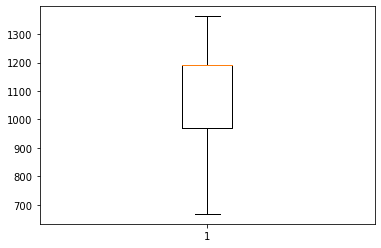

In [2541]:
plt.boxplot(dataSet["wip"])
plt.show()

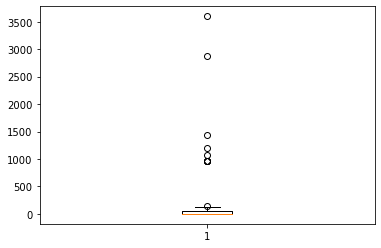

In [2542]:
plt.boxplot(dataSet["incentive"])
plt.show()

In [2543]:
print(dataSet['incentive'].quantile(0.10))
print(dataSet['incentive'].quantile(0.90))

0.0
63.0


In [2544]:
print(dataSet['incentive'].skew())

dataSet['incentive']=np.where(dataSet['incentive'] < 0.0 , 0.0 , dataSet['incentive'])
dataSet['incentive']=np.where(dataSet['incentive'] > 63.0 , 63.0 , dataSet['incentive'])

print(dataSet['incentive'].skew())

15.790746016958247
0.3549744433565577


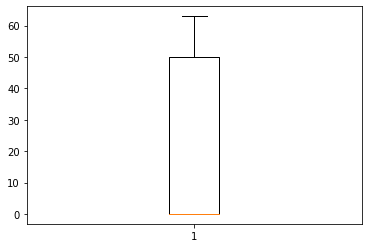

In [2545]:
plt.boxplot(dataSet["incentive"])
plt.show()

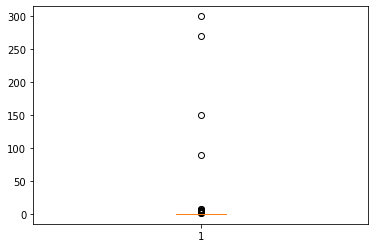

In [2546]:
plt.boxplot(dataSet["idle_time"])
plt.show()

In [2547]:
print(dataSet['idle_time'].quantile(0.10))
print(dataSet['idle_time'].quantile(0.90))

0.0
0.0


In [2548]:
dataSet.idle_time.skew()

20.545425229670172

In [2549]:
print(dataSet['idle_time'].skew())

dataSet['idle_time']=np.where(dataSet['idle_time'] < 0.0 , 0.0 , dataSet['idle_time'])
dataSet['idle_time']=np.where(dataSet['idle_time'] > 0.0 , 0.0 , dataSet['idle_time'])

print(dataSet['idle_time'].skew())

20.545425229670172
0


<AxesSubplot:>

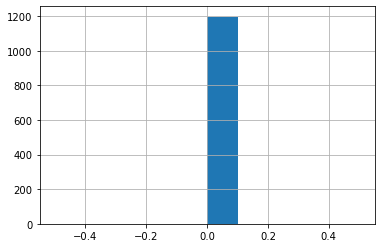

In [2550]:
dataSet["idle_time"].hist()


In [2551]:
dataSet.skew()

date                     0.451140
quarter                  0.386482
day                     -0.021836
team                     0.009848
targeted_productivity   -0.852990
smv                      0.405937
wip                     -0.905825
over_time                0.673287
incentive                0.354974
idle_time                0.000000
idle_men                 9.855079
no_of_style_change       2.942506
no_of_workers           -0.110965
actual_productivity     -0.807492
department_finishing     1.440516
department_finishing     1.391345
department_sweing       -0.313258
dtype: float64

<AxesSubplot:>

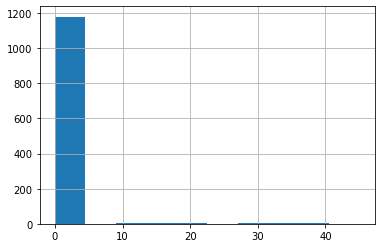

In [2552]:
dataSet["idle_men"].hist()

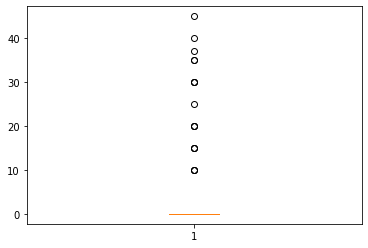

In [2553]:
plt.boxplot(dataSet["idle_men"])
plt.show()

In [2554]:
print(dataSet['idle_men'].quantile(0.10))
print(dataSet['idle_men'].quantile(0.90))

0.0
0.0


In [2555]:
print(dataSet['idle_men'].skew())

dataSet['idle_men']=np.where(dataSet['idle_men'] < 0.0 , 0.0 , dataSet['idle_men'])
dataSet['idle_men']=np.where(dataSet['idle_men'] > 0.0 , 0.0 , dataSet['idle_men'])

print(dataSet['idle_men'].skew())

9.855079123524012
0


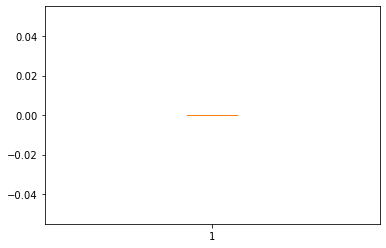

In [2556]:
plt.boxplot(dataSet["idle_men"])
plt.show()

<AxesSubplot:>

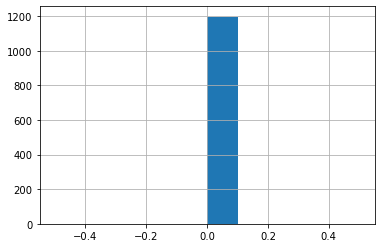

In [2557]:
dataSet["idle_men"].hist()

In [2558]:
dataSet.skew()

date                     0.451140
quarter                  0.386482
day                     -0.021836
team                     0.009848
targeted_productivity   -0.852990
smv                      0.405937
wip                     -0.905825
over_time                0.673287
incentive                0.354974
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       2.942506
no_of_workers           -0.110965
actual_productivity     -0.807492
department_finishing     1.440516
department_finishing     1.391345
department_sweing       -0.313258
dtype: float64

In [2559]:
print(dataSet['no_of_style_change'].quantile(0.10))
print(dataSet['no_of_style_change'].quantile(0.90))

0.0
1.0


In [2560]:
print(dataSet['no_of_style_change'].skew())

dataSet['no_of_style_change']=np.where(dataSet['no_of_style_change'] < 0.0 , 0.0 , dataSet['no_of_style_change'])
dataSet['no_of_style_change']=np.where(dataSet['no_of_style_change'] > 1.0 , 1.0 , dataSet['no_of_style_change'])

print(dataSet['no_of_style_change'].skew())

2.9425059460671514
2.3013315590232306


In [2561]:
dataSet.skew()

date                     0.451140
quarter                  0.386482
day                     -0.021836
team                     0.009848
targeted_productivity   -0.852990
smv                      0.405937
wip                     -0.905825
over_time                0.673287
incentive                0.354974
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       2.301332
no_of_workers           -0.110965
actual_productivity     -0.807492
department_finishing     1.440516
department_finishing     1.391345
department_sweing       -0.313258
dtype: float64

In [2562]:
print(dataSet['no_of_style_change'].quantile(0.10))
print(dataSet['no_of_style_change'].quantile(0.90))

0.0
1.0


<AxesSubplot:>

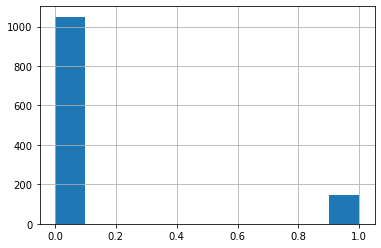

In [2563]:
dataSet["no_of_style_change"].hist()

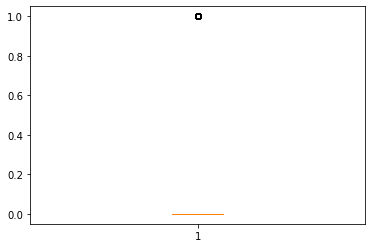

In [2564]:
plt.boxplot(dataSet["no_of_style_change"])
plt.show()

In [2565]:
print(dataSet['department_finishing'].quantile(0.10))
print(dataSet['department_finishing'].quantile(0.90))

0.0
1.0


In [2566]:
print(dataSet['department_finishing'].skew())

dataSet['department_finishing']=np.where(dataSet['department_finishing'] < 0.0 , 0.0 , dataSet['department_finishing'])
dataSet['department_finishing']=np.where(dataSet['department_finishing'] > 1.0 , 1.0 , dataSet['department_finishing'])

print(dataSet['department_finishing'].skew())

1.440516022770846
1.440516022770846


In [2567]:
dataSet["no_of_style_change"]=dataSet["no_of_style_change"].map(lambda i: np.log(i) if i> 0 else 0)
print(dataSet['no_of_style_change'].skew())


0


In [2568]:
dataSet.skew()

date                     0.451140
quarter                  0.386482
day                     -0.021836
team                     0.009848
targeted_productivity   -0.852990
smv                      0.405937
wip                     -0.905825
over_time                0.673287
incentive                0.354974
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers           -0.110965
actual_productivity     -0.807492
department_finishing     1.440516
department_finishing     1.391345
department_sweing       -0.313258
dtype: float64

In [2569]:
dataSet["department_finishing"]=dataSet["department_finishing"].map(lambda i: np.log(i) if i> 0 else 0)
print(dataSet['department_finishing'].skew())

0


In [2570]:
dataSet["department_finishing"]=dataSet["department_finishing"].map(lambda i: np.log(i) if i> 0 else 0)
print(dataSet['department_finishing'].skew())

0


In [2571]:
dataSet.columns

Index(['date', 'quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'department_finishing',
       'department_finishing ', 'department_sweing'],
      dtype='object')

In [2572]:
dataSet.columns=['date', 'quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'department_finishing',
       'department_finishing+', 'department_sweing']

In [2573]:
dataSet.columns

Index(['date', 'quarter', 'day', 'team', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'department_finishing',
       'department_finishing+', 'department_sweing'],
      dtype='object')

In [2574]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   float64
 12  no_of_workers          1197 non-null   int32  
 13  actual_productivity    1197 non-null   float64
 14  department_finishing   1197 non-null   int64  
 15  depa

In [2575]:
dataSet.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing+,department_sweing
0,112015,1,6,8,0.80,26.16,1108.000000,7080,63.0,0.0,0.0,0.0,59,0.940725,0,0,1
1,112015,1,6,1,0.75,3.94,1190.465991,960,0.0,0.0,0.0,0.0,8,0.886500,0,1,0
2,112015,1,6,11,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0,1
3,112015,1,6,12,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0,1
4,112015,1,6,6,0.80,25.90,1170.000000,1920,50.0,0.0,0.0,0.0,56,0.800382,0,0,1


In [2576]:
print(dataSet['department_finishing+'].quantile(0.10))
print(dataSet['department_finishing+'].quantile(0.90))

0.0
1.0


In [2577]:
print(dataSet['department_finishing+'].skew())

dataSet['department_finishing+']=np.where(dataSet['department_finishing+'] < 0.0 , 0.0 , dataSet['department_finishing+'])
dataSet['department_finishing+']=np.where(dataSet['department_finishing+'] > 1.0 , 1.0 , dataSet['department_finishing+'])

print(dataSet['department_finishing+'].skew())

1.3913454590967615
1.3913454590967615


In [2578]:
dataSet["department_finishing+"]=dataSet["department_finishing+"].map(lambda i: np.log(i) if i> 0 else 0)
print(dataSet['department_finishing+'].skew())

0


In [2579]:
dataSet.skew()

date                     0.451140
quarter                  0.386482
day                     -0.021836
team                     0.009848
targeted_productivity   -0.852990
smv                      0.405937
wip                     -0.905825
over_time                0.673287
incentive                0.354974
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers           -0.110965
actual_productivity     -0.807492
department_finishing     0.000000
department_finishing+    0.000000
department_sweing       -0.313258
dtype: float64

In [2580]:
dataSet.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing+,department_sweing
0,112015,1,6,8,0.80,26.16,1108.000000,7080,63.0,0.0,0.0,0.0,59,0.940725,0,0.0,1
1,112015,1,6,1,0.75,3.94,1190.465991,960,0.0,0.0,0.0,0.0,8,0.886500,0,0.0,0
2,112015,1,6,11,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0.0,1
3,112015,1,6,12,0.80,11.41,968.000000,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0.0,1
4,112015,1,6,6,0.80,25.90,1170.000000,1920,50.0,0.0,0.0,0.0,56,0.800382,0,0.0,1


In [2581]:
dataSet.wip=dataSet.wip.astype(int)

In [2582]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int32  
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   float64
 12  no_of_workers          1197 non-null   int32  
 13  actual_productivity    1197 non-null   float64
 14  department_finishing   1197 non-null   int64  
 15  depa

In [2583]:
dataSet.head()

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing+,department_sweing
0,112015,1,6,8,0.80,26.16,1108,7080,63.0,0.0,0.0,0.0,59,0.940725,0,0.0,1
1,112015,1,6,1,0.75,3.94,1190,960,0.0,0.0,0.0,0.0,8,0.886500,0,0.0,0
2,112015,1,6,11,0.80,11.41,968,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0.0,1
3,112015,1,6,12,0.80,11.41,968,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0.0,1
4,112015,1,6,6,0.80,25.90,1170,1920,50.0,0.0,0.0,0.0,56,0.800382,0,0.0,1


In [2584]:
dataSet

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_finishing+,department_sweing
0,112015,1,6,8,0.80,26.16,1108,7080,63.0,0.0,0.0,0.0,59,0.940725,0,0.0,1
1,112015,1,6,1,0.75,3.94,1190,960,0.0,0.0,0.0,0.0,8,0.886500,0,0.0,0
2,112015,1,6,11,0.80,11.41,968,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0.0,1
3,112015,1,6,12,0.80,11.41,968,3660,50.0,0.0,0.0,0.0,30,0.800570,0,0.0,1
4,112015,1,6,6,0.80,25.90,1170,1920,50.0,0.0,0.0,0.0,56,0.800382,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3112015,2,5,10,0.75,2.90,1190,960,0.0,0.0,0.0,0.0,8,0.628333,0,0.0,0
1193,3112015,2,5,8,0.70,3.90,1190,960,0.0,0.0,0.0,0.0,8,0.625625,0,0.0,0
1194,3112015,2,5,7,0.65,3.90,1190,960,0.0,0.0,0.0,0.0,8,0.625625,0,0.0,0
1195,3112015,2,5,9,0.75,2.90,1190,1800,0.0,0.0,0.0,0.0,15,0.505889,0,0.0,0


In [2585]:
column=dataSet['actual_productivity']

In [2586]:
dataSet=dataSet.drop(['actual_productivity'] ,axis=1)

In [2587]:
dataSet=pd.concat([dataSet,column] ,axis=1)

In [2647]:
x=dataSet.iloc[:,:16].values
y=dataSet.iloc[:,16:17].values

In [2648]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [2649]:
from sklearn.preprocessing import OneHotEncoder
hot=OneHotEncoder()
y=hot.fit_transform(y).toarray()

In [2685]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [2686]:
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential() 
model.add(Dense(17,  input_dim=16, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='softmax'))

In [2693]:
model.compile(loss='mean_squared_error' , optimizer='adam',metrics='accuracy')

In [2694]:
history = model.fit(x_train,y_train , epochs=100 , batch_size=64)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 8/100
15/15 [==============================] - 0s 997us/step - loss: 0.9989 - accuracy: 0.0011
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 1

15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 88/100
15/15 [==============================] - 0s 998us/step - loss: 0.9989 - accuracy: 0.0011
Epoch 89/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.0011
Epoch 90/100
15/15 [==============================] - 0s 969us/step - loss: 0.9989 - accuracy: 0.0011
Epoch 91/100
15/15 [==============================] - 0s 955us/step - loss: 0.9989 - accuracy: 0.0011
Epoch 9

In [2689]:
y_pred=model.predict(x_test)
pred = list() 
for i in range (len(y_pred)):
  pred.append(np.argmax(y_pred[i]))
  test = list() 
for i in range (len(y_test)): 
  test.append(np.argmax(y_test[i]))

In [2690]:
from sklearn.metrics import accuracy_score
a= accuracy_score(pred,test)
print('accuracy is:', a*100 ) 

accuracy is: 0.0


In [2666]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int32  
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   float64
 12  no_of_workers          1197 non-null   int32  
 13  department_finishing   1197 non-null   int64  
 14  department_finishing+  1197 non-null   float64
 15  depa

In [2691]:
from keras.models import load_model
model.save('my_model.h5')
del model
model= load_model('my_model.h5')

In [2692]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int32  
 1   quarter                1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   int32  
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   float64
 12  no_of_workers          1197 non-null   int32  
 13  department_finishing   1197 non-null   int64  
 14  department_finishing+  1197 non-null   float64
 15  depa